<a href="https://colab.research.google.com/github/parthkohli92/Face-Mask-Detection/blob/main/Face-%20Mask-and-Social-Distancing-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask and social distancing detection using VGG19

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download lalitharajesh/haarcascades

  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 48.6MB/s]


In [ ]:
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset

 96% 318M/330M [00:01<00:00, 178MB/s]
100% 330M/330M [00:02<00:00, 168MB/s]


In [ ]:
! kaggle datasets download andrewmvd/face-mask-detection

100% 397M/398M [00:03<00:00, 173MB/s]
100% 398M/398M [00:03<00:00, 119MB/s]


Objective is to build a Deep Learning model which can identify if the person is wearing a mask or not, also detecting if people vilating social distancing norms

In [ ]:
import numpy as np 
import pandas as pd 
import cv2 
from scipy.spatial import distance

In [ ]:
!unzip /content/haarcascades.zip

Archive:  /content/haarcascades.zip
  inflating: haarcascade_eye.xml     
  inflating: haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascade_frontalcatface.xml  
  inflating: haarcascade_frontalcatface_extended.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_default.xml  
  inflating: haarcascade_fullbody.xml  
  inflating: haarcascade_lefteye_2splits.xml  
  inflating: haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascade_lowerbody.xml  
  inflating: haarcascade_profileface.xml  
  inflating: haarcascade_righteye_2splits.xml  
  inflating: haarcascade_russian_plate_number.xml  
  inflating: haarcascade_smile.xml   
  inflating: haarcascade_upperbody.xml  


In [ ]:
! unzip /content/face-mask-detection.zip -d /content/face-mask-detection

Archive:  /content/face-mask-detection.zip
  inflating: /content/face-mask-detection/annotations/maksssksksss0.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss1.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss10.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss100.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss101.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss102.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss103.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss104.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss105.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss106.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss107.xml  
  inflating: /content/face-mask-detection/annotations/maksssksksss108.xml  
  inflating: /content/face-mask-detection/annotati

In [ ]:
face_model = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

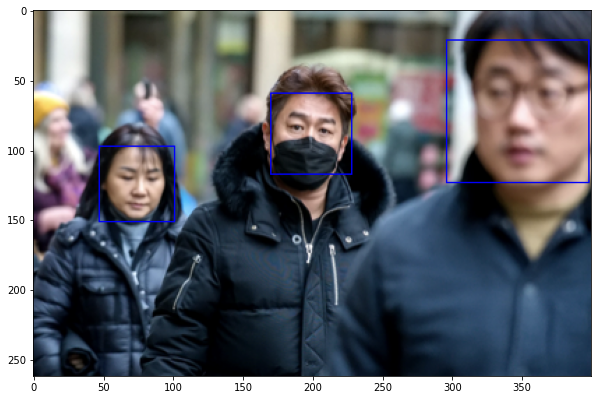

In [ ]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/face-mask-detection/images/maksssksksss244.png')
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

## Plotting 
for (x,y,w,h) in faces:
  cv2.rectangle(out_img, (x,y), (x+w,y+h), (0,0,255),1)
plt.figure(figsize=(10,10))
plt.imshow(out_img)

## Detecting Social Distancing Violations 

In [ ]:
MIN_DISTANCE = 130

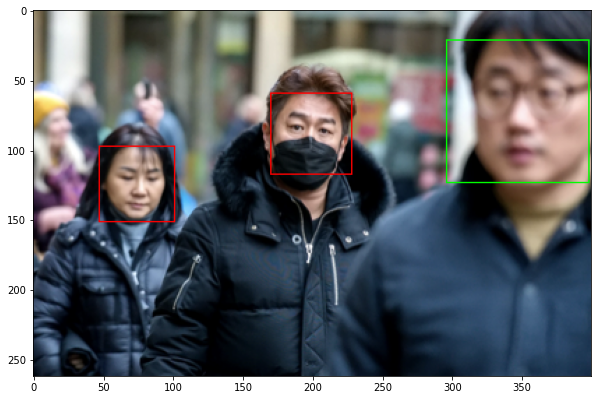

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [ ]:
! unzip /content/face-mask-12k-images-dataset.zip -d /content/face-mask-12k

Streaming output truncated to the last 5000 lines.
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: /content/face-mask-12k/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: /content/face-mask-12k/

## Using VGG19 for mask detection 

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/face-mask-12k/Face Mask Dataset/Train'
test_dir = '/content/face-mask-12k/Face Mask Dataset/Test'
val_dir = '/content/face-mask-12k/Face Mask Dataset/Validation'

In [ ]:
# Data Augmentation 
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2)
train_generator=train_datagen.flow_from_directory(directory=train_dir,
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 10000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255,)
test_generator=test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 992 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1.0/255,)
val_generator=val_datagen.flow_from_directory(directory=val_dir,
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 800 images belonging to 2 classes.


In [ ]:
# Loading the model
vgg19= VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))

for layer in vgg19.layers:
  layer.trainable = False

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Compiling the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# Running it 
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
9/9 [==============================] - 61s 7s/step - loss: 0.5678 - accuracy: 0.7153
Epoch 2/20
9/9 [==============================] - 59s 7s/step - loss: 0.2547 - accuracy: 0.8958
Epoch 3/20
9/9 [==============================] - 59s 7s/step - loss: 0.1745 - accuracy: 0.9340
Epoch 4/20
9/9 [==============================] - 59s 6s/step - loss: 0.1440 - accuracy: 0.9340
Epoch 5/20
9/9 [==============================] - 59s 7s/step - loss: 0.1269 - accuracy: 0.9514
Epoch 6/20
9/9 [==============================] - 59s 7s/step - loss: 0.0733 - accuracy: 0.9861
Epoch 7/20
9/9 [==============================] - 59s 7s/step - loss: 0.1299 - accuracy: 0.9583
Epoch 8/20
9/9 [==============================] - 59s 7s/step - loss: 0.1095 - accuracy: 0.9583
Epoch 9/20
9/9 [==============================] - 59s 7s/step - loss: 0.0658 - accuracy: 0.9861
Epoch 10/20
9/9 [==============================] - 59s 6s/step - loss: 0.0927 - accuracy: 0.9653
Epoch 11/20
9/9 [======================

In [ ]:
model.evaluate(test_generator)

31/31 [==============================] - 198s 6s/step - loss: 0.0519 - accuracy: 0.9829


[0.05191117897629738, 0.9828628897666931]

Model achieved 98.2% accuracy on the test data. 

## Testing the model on the test data 

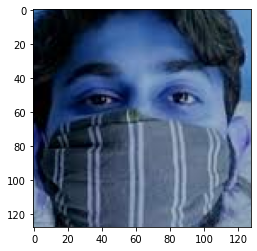

In [ ]:
sample_mask_img = cv2.imread('/content/face-mask-12k/Face Mask Dataset/Test/WithMask/1175.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)

In [ ]:
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
model.predict(sample_mask_img)

array([[0.87815404, 0.11502841]], dtype=float32)

In [ ]:
model.save('masknet.h5')

## Integrating the haar cascade

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

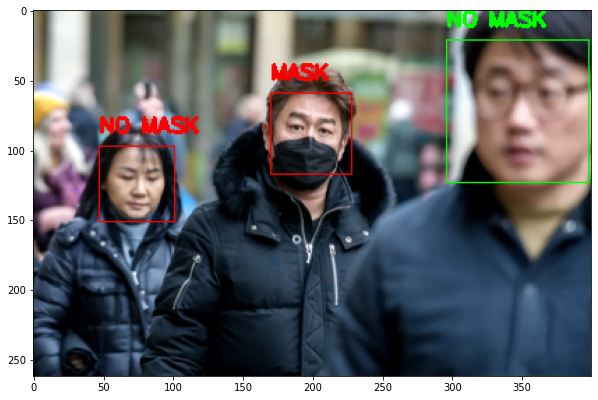

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")